# LAB 3.1 - TF model subclassing

<a target="_blank" href="https://colab.research.google.com/github/rramosp/2021.deeplearning/blob/main/content/U3%20LAB%2001%20-%20Tensorflow%20model%20subclassing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The labs require a `tensorflow` version lower than the default one used in Google Colab. Run the following cell to downgrade TensorFlow accordingly.

In [ ]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

In [ ]:
from local.lib.rlxmoocapi import submit, session
import inspect
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.01", varname="student");

In [6]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.19.0'



**A multilayer perceptron**

assuming $n$ layers, the output at layer $i$

$$\mathbf{a}_i = \text{activation}(\mathbf{a}_{i-1} \cdot \mathbf{W}_i + \mathbf{b}_i)$$

at the first layer

$$\mathbf{a}_0 = \text{activation}(\mathbf{X} \cdot \mathbf{W}_0 + \mathbf{b}_0)$$

and the layer prediction is the output of the last layer:

$$\hat{\mathbf{y}} = \mathbf{a}_{n-1}$$

with $\text{activation}$ being an activation function, such as $\text{sigmoid}(z) = \frac{1}{1+e^{-z}}$, $\text{tanh}$, $\text{ReLU}$, etc.


**Cost (with regularization)**


$$J(\mathbf{b}_1, b_2, \mathbf{W}_1, \mathbf{W}_2) = \frac{1}{m}\sum_{i=0}^{m-1} (\hat{y}-y)^2 + \lambda \sum_{i=0}^{n-1} \bigg[ \| \mathbf{b}_i\|^2 + \|\mathbf{W}_i\|^2 \bigg]$$


$\lambda$ regulates the participation of the regularization terms. Given a vector or matrix $\mathbf{T}$, its squared norm is denoted by $||\mathbf{T}||^2 \in \mathbb{R}$ and it's computed by squaring all its elements and summing them all up.


## TASK 1: Model `build`

Observe the class template below which is used to build a multilayer perceptron with a specific number of layers. In the constructor.

- `neurons` must be a list of integers specifying the number of neurons of each hidden layer and the output layer.
- `activations` must be a list of strings specifying  the activations of the neurons of each layer.

Both `neurons` and `activations` must have the same number of elements. Observe how in the class constructor (`__init__`) we check for this and transform the list of activation strings to actual TF funcions.

**YOU MUST** complete the `build` method in the class below so that `self.W` and `self.b` contain a list of tensors with randomly initialized weights for each layer. Create the weights by calling the `self.add_weights` function for each layer, both for the weights (add them to list `self.W`) and the biases (add them to list `b`). Call `self.add_weights` with parameters `initializer='random_normal', trainable=True, dtype=tf.float32`.

Note that the shape of the first layer weights are not known until the `build` method is called which is when the `input_shape` for the input data is known. For instance, the following invokations


    >> mlp = MLP_class(neurons=[10,5,1], activations=["tanh","tanh", "sigmoid"])
    >> mlp.build([None, 2])
    >> print ("W shapes", [i.shape for i in mlp.W])
    
should produce the following output
    
    W shapes [TensorShape([2, 10]), TensorShape([10, 5]), TensorShape([5, 1])]
    b shapes [TensorShape([10]), TensorShape([5]), TensorShape([1])]

In [9]:
def MLP(neurons, activations, reg=0.):

    from tensorflow.keras import Model
    from tensorflow.keras.activations import relu, sigmoid, tanh, linear
    import numpy as np
    import tensorflow as tf

    class MLP_class(Model):
        def __init__(self, neurons, activations, reg=0.):
            super().__init__()
            self.activation_map = {"linear": linear, "relu": relu, "tanh":tanh, "sigmoid": sigmoid}

            assert len(neurons)==len(activations), \
                        "must have the same number of neurons and activations"

            assert np.all([i in self.activation_map.keys() for i in activations]), \
                                "activation string not recognized"

            self.neurons = neurons
            self.reg = reg
            self.activations = [self.activation_map[i] for i in activations]

            super().__init__()

        def build(self, input_shape):
            self.W = []
            self.b = []

            ... # YOUR CODE HERE


    return MLP_class(neurons, activations, reg)


test manually your code

In [ ]:
mlp = MLP(neurons=[10,5,1], activations=["tanh","tanh", "sigmoid"])
mlp.build([None, 2])
print ("W shapes", [i.shape for i in mlp.W])
print ("b shapes", [i.shape for i in mlp.b])

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T1');

## Task 2: Model `call`

Complete the `call` method below so that it computes the output of the configured MLP with the input `X` as

$$\hat{\mathbf{y}} = \mathbf{a}_{n-1}$$

as described above. Use `self.W`, `self.b` and `self.activations` as constructed previously on the `build` and `__init__` methods.

In [ ]:
def MLP2(neurons, activations, reg=0.):

    from tensorflow.keras import Model
    from tensorflow.keras.activations import relu, sigmoid, tanh, linear

    class MLP_class(Model):
        def __init__(self, neurons, activations, reg=0.):
            super().__init__()
            self.activation_map = {"linear": linear, "relu": relu, "tanh":tanh, "sigmoid": sigmoid}

            assert len(neurons)==len(activations), \
                        "must have the same number of neurons and activations"

            assert np.all([i in self.activation_map.keys() for i in activations]), \
                                "activation string not recognized"

            self.neurons = neurons
            self.reg = reg
            self.activations = [self.activation_map[i] for i in activations]

            super().__init__()

        def build(self, input_shape):
            self.W = []
            self.b = []

            ... # YOUR CODE HERE (copy from previous task )

        @tf.function
        def call(self, X):
            a = ... # YOUR CODE HERE
            return s

    return MLP_class(neurons, activations, reg)

test manually your code, the following two cells must return the same value everytime you execute them. Observe your MLP will initialize to different random weights each time.

In [ ]:
X = np.random.random(size=(4,2))
neurons = [3,2]
mlp = MLP2(neurons=[3,2], activations=["linear", "sigmoid"])
mlp(X)

In [ ]:
sigm = lambda x: 1/(1+np.exp(-x))
W = [i.numpy() for i in mlp.W]
b = [i.numpy() for i in mlp.b]
sigm((X.dot(W[0])+b[0]).dot(W[1])+b[1])

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T2');

## Task 3: Loss function

Complete the `loss` method below so that it computes the loss of the `MLP` given predictions `y_pred` (as the output of the network) and desired output `y_true`.

$$J(\mathbf{b}_1, b_2, \mathbf{W}_1, \mathbf{W}_2) = \frac{1}{m}\sum_{i=0}^{m-1} (\hat{y}-y)^2 + \lambda \sum_{i=0}^{n-1} \bigg[ \| \mathbf{b}_i\|^2_{mean} + \|\mathbf{W}_i\|^2_{mean} \bigg]$$


observe the regularization term $\lambda$ which is stored as `self.reg` in your class.

For any weight or bias $\mathbf{k}$, the expression $\| \mathbf{k}\|^2_{mean}$ is the mean of all its elements squared.

In [ ]:
def MLP3(neurons, activations, reg=0.):

    from tensorflow.keras import Model
    from tensorflow.keras.activations import relu, sigmoid, tanh, linear

    class MLP_class(Model):
        def __init__(self, neurons, activations, reg=0.):
            super().__init__()
            self.activation_map = {"linear": linear, "relu": relu, "tanh":tanh, "sigmoid": sigmoid}

            assert len(neurons)==len(activations), \
                        "must have the same number of neurons and activations"

            assert np.all([i in self.activation_map.keys() for i in activations]), \
                                "activation string not recognized"

            self.neurons = neurons
            self.reg = reg
            self.activations = [self.activation_map[i] for i in activations]

            super().__init__()

        def build(self, input_shape):
            self.W = []
            self.b = []

            ... # YOUR CODE HERE (copy from previous task)

        @tf.function
        def call(self, X):
            a = ... # YOUR CODE HERE (copy from previous task)
            return s


        @tf.function
        def custom_loss(self, y_true, y_pred):
            r = ... # YOUR CODE HERE
            return ...

    return MLP_class(neurons, activations, reg)

test manually your code, the following two cells must return the same value everytime you execute them. Observe your MLP will initialize to different random weights each time.

In [46]:
X = np.random.random(size=(4,2)).astype(np.float32)
y_true = np.random.randint(2, size=(len(X),1)).astype(np.float32)
neurons = [3,2]
mlp = MLP3(neurons=[3,1], activations=["linear", "sigmoid"], reg=0.2)
mlp.custom_loss(mlp(X), y_true).numpy()

np.float32(0.25332093)

In [47]:
sigm = lambda x: 1/(1+np.exp(-x))
W = [i.numpy() for i in mlp.W]
b = [i.numpy() for i in mlp.b]
y_pred = sigm((X.dot(W[0])+b[0]).dot(W[1])+b[1])
((y_pred-y_true)**2).mean() + mlp.reg * np.sum([(i**2).numpy().mean() for i in mlp.W+mlp.b])

np.float32(0.25332093)

**Registra tu solución en linea**

In [ ]:
student.submit_task(namespace=globals(), task_id='T3');

## Done!!

now you can try your class with synthetic data

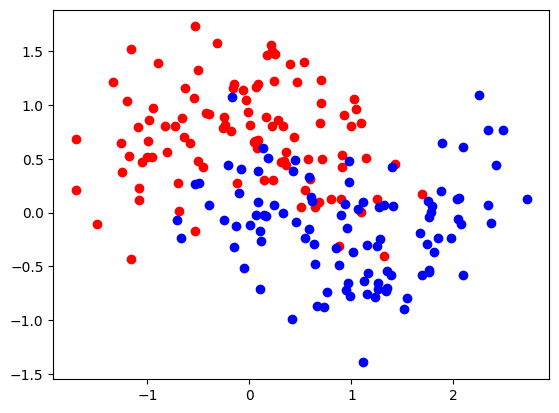

In [52]:
X, y = make_moons(200, noise=.35)
X, y = X.astype(np.float32), y.astype(np.float32).reshape(-1,1)
plt.scatter(X[:,0][y[:,0]==0], X[:,1][y[:,0]==0], color="red", label="class 0")
plt.scatter(X[:,0][y[:,0]==1], X[:,1][y[:,0]==1], color="blue", label="class 1")

create MLP and train!!

In [53]:
mlp = MLP3(neurons=[10,1], activations=["tanh","sigmoid"], reg=0.0)
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss=mlp.custom_loss,
           metrics=[tf.keras.metrics.mae, tf.keras.metrics.binary_accuracy])

In [54]:
!rm -rf logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/no_regularization")
mlp.fit(X,y, epochs=400, batch_size=16, verbose=0,
        callbacks=[tensorboard_callback])

observe the accuracy and classification frontier

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


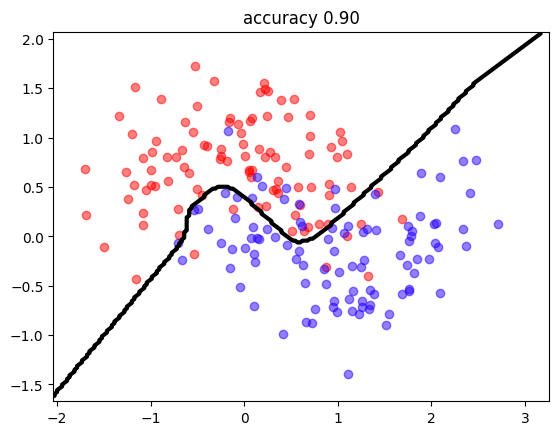

In [55]:
predict = lambda X: (mlp.predict(X)[:,0]>0.5).astype(int)
mlutils.plot_2Ddata_with_boundary(predict, X, y.reshape(-1));
plt.title("accuracy %.2f"%np.mean(predict(X)==y.reshape(-1)));

regularization must work!!!

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


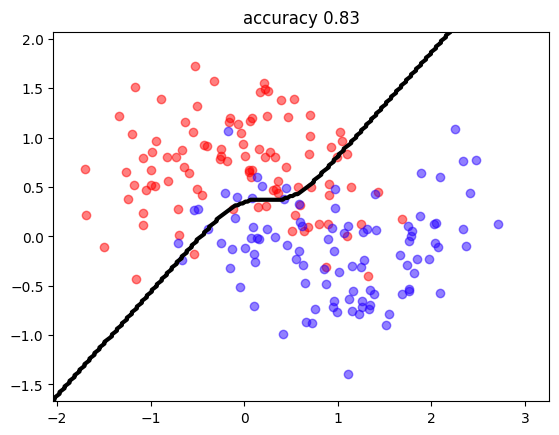

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/with_regularization")
mlp = MLP3(neurons=[10,1], activations=["tanh","sigmoid"], reg=0.005)

mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss=mlp.custom_loss,
           metrics=[tf.keras.metrics.mae, tf.keras.metrics.binary_accuracy])

mlp.fit(X,y, epochs=400, batch_size=10, verbose=0, callbacks=[tensorboard_callback])
mlutils.plot_2Ddata_with_boundary(predict, X, y.reshape(-1))
plt.title("accuracy %.2f"%np.mean(predict(X)==y.reshape(-1)));

and inspect tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs
